# **BASIC VISUALISATIONS**

---
---

## Description

This notebook contains basic visualisations from 3 of the main graph rendering libraries in Python- Matplotlib, Seaborn and Plotly. It goes to provide further insights on specific findings.

## Objectives

* Generate basic visualisations for analysis.
* Provide summaries for insights extrapolated from generated graphs.

## Inputs

* Cleaned CSV file.

## Outputs

* 6 visualisations.

## Additional Comments

* This dataset was sourced from this current project environment created. It is the cleaned version created for analysis purposes.

---

## Change Working Directory

We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory. When you restart the kernel (and clear outputs, if necessary) always be certain that these 3 cells run in order.

We need to change the working directory from its current folder to its parent folder:
* We access the current directory with *os.getcwd()*.
* We confirm the current directory with *current_dir* defined in the variable.

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\F_bee\\Documents\\vs-code\\vs-code-projects\\github\\air-quality-dashboard\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory:
* *os.path.dirname()* gets the parent directory.
* *os.chir() defines* the new current directory.

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory.

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\F_bee\\Documents\\vs-code\\vs-code-projects\\github\\air-quality-dashboard'

---
---

## Key for DateFrame

- **State Code**: Numeric code for the US state.
- **County Code**: Numeric code for the county within the state.
- **Site Number**: Identifier for the monitoring site.
- **Address**: Physical address of the monitoring site.
- **State**: Name of the US state.
- **County**: Name of the county.
- **City**: Name of the city.
- **NO2 Units**: Measurement units for nitrogen dioxide (NO₂).
- **NO2 Mean**: Mean value of NO₂ for the day.
- **NO2 1st Max Value**: Highest NO₂ value recorded that day.
- **NO2 1st Max Hour**: Hour when the highest NO₂ value was recorded.
- **NO2 AQI**: Air Quality Index for NO₂.
- **O3 Units**: Measurement units for ozone (O₃).
- **O3 Mean**: Mean value of O₃ for the day.
- **O3 1st Max Value**: Highest O₃ value recorded that day.
- **O3 1st Max Hour**: Hour when the highest O₃ value was recorded.
- **O3 AQI**: Air Quality Index for O₃.
- **SO2 Units**: Measurement units for sulfur dioxide (SO₂).
- **SO2 Mean**: Mean value of SO₂ for the day.
- **SO2 1st Max Value**: Highest SO₂ value recorded that day.
- **SO2 1st Max Hour**: Hour when the highest SO₂ value was recorded.
- **SO2 AQI**: Air Quality Index for SO₂.
- **CO Units**: Measurement units for carbon monoxide (CO).
- **CO Mean**: Mean value of CO for the day.
- **CO 1st Max Value**: Highest CO value recorded that day.
- **CO 1st Max Hour**: Hour when the highest CO value was recorded.
- **CO AQI**: Air Quality Index for CO.
- **Date**: Date of measurement (YYYY-MM-DD).
- **Year**: Year of measurement.
- **Month**: Month of measurement.

---

In [4]:
# Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib as mb
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
import plotly.express as px

print("All packages imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mb.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Plotly version: {pt.__version__}")

All packages imported successfully!
NumPy version: 2.3.0
Pandas version: 2.3.0
Matplotlib version: 3.10.3
Seaborn version: 0.13.2
Plotly version: 6.1.2


In [ ]:
# Load the dataset
df = pd.read_csv("outputs/pollution_us_2000_2016_cleaned.csv")
df.head()

,State Code,County Code,Site Number,Address,State,County,City,NO2 Units,NO2 Mean,NO2 1st Max Value,...,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Date,Year,Month
0,6,65,8001,"5888 MISSION BLVD., RUBIDOUX",California,Riverside,Rubidoux,Parts per billion,25.160870,35.8,...,7,1.0,Parts per million,0.741667,1.0,7,11.0,2013-02-13,2013,2
1,40,21,9002,"P.O. BOX 948 TAHLEQUAH, OK 74464",Oklahoma,Cherokee,Park Hill,Parts per billion,7.666667,20.0,...,10,3.0,Parts per million,0.062500,0.1,0,1.0,2002-09-03,2002,9
2,6,37,4006,"2425 Webster St., Long Beach, CA",California,Los Angeles,Long Beach,Parts per billion,14.721739,24.2,...,13,4.0,Parts per million,0.341667,0.5,5,6.0,2015-09-06,2015,9
3,25,25,42,HARRISON AVE,Massachusetts,Suffolk,Boston,Parts per billion,15.458333,26.0,...,3,14.0,Parts per million,0.025000,0.1,8,1.0,2004-04-12,2004,4
4,6,83,2011,"380 N FAIRVIEW AVENUE, GOLETA",California,Santa Barbara,Goleta,Parts per billion,3.478261,12.0,...,3,1.0,Parts per million,0.000000,0.0,0,0.0,2007-02-28,2007,2


## Section 1

Matplotlib visualisations.

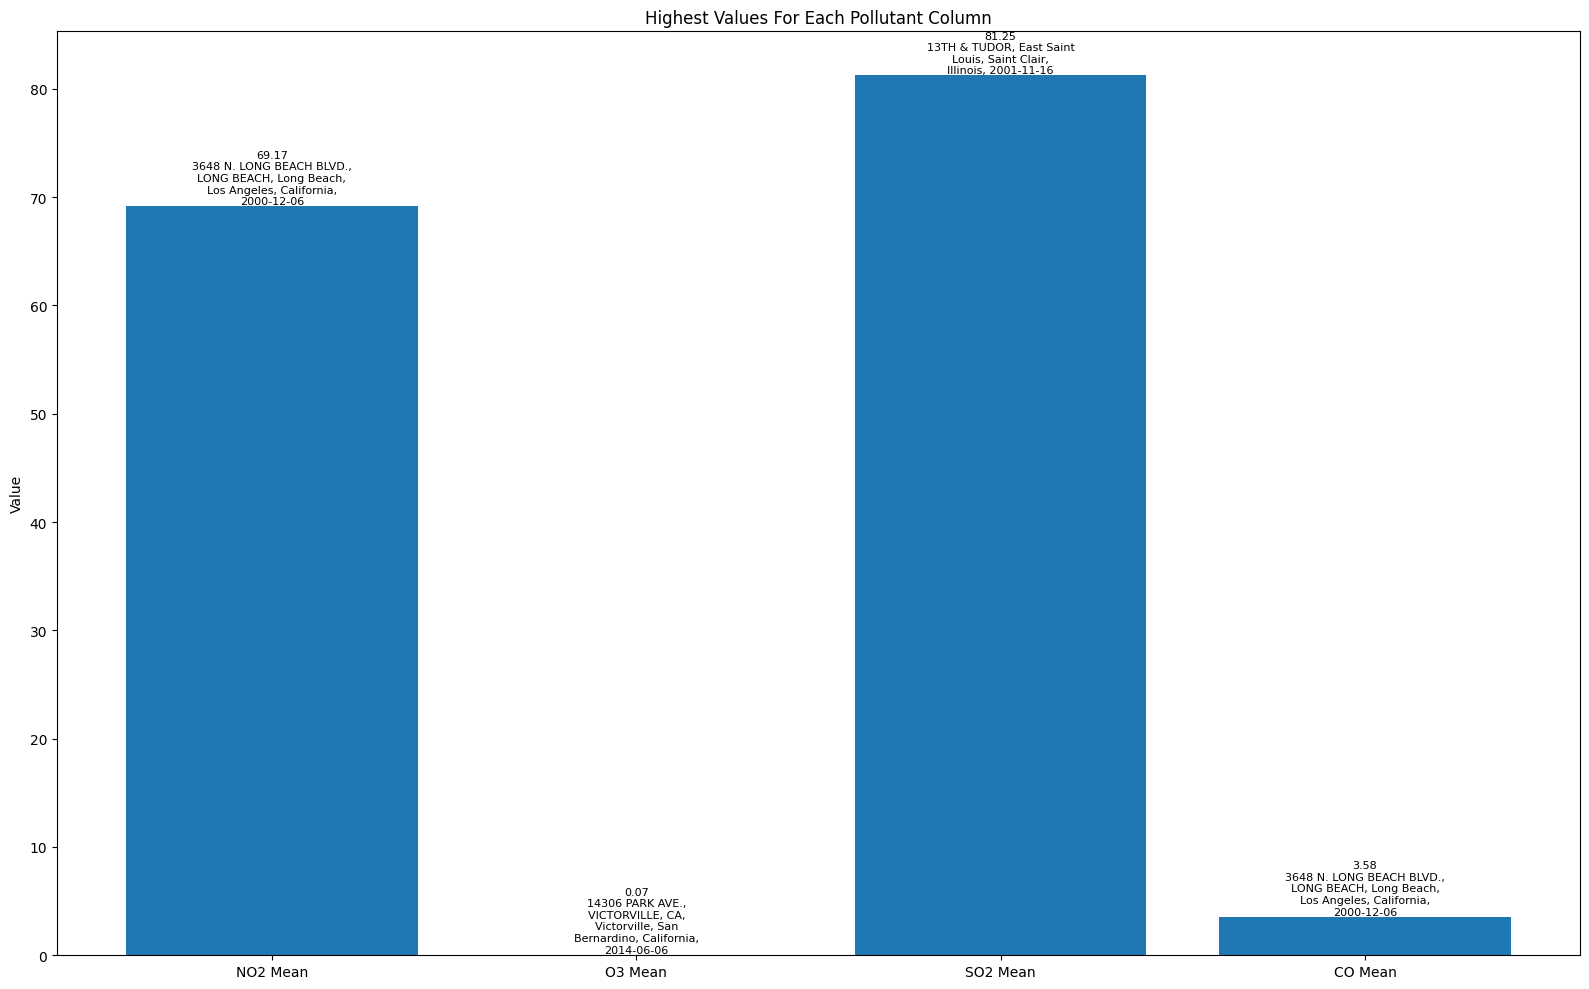

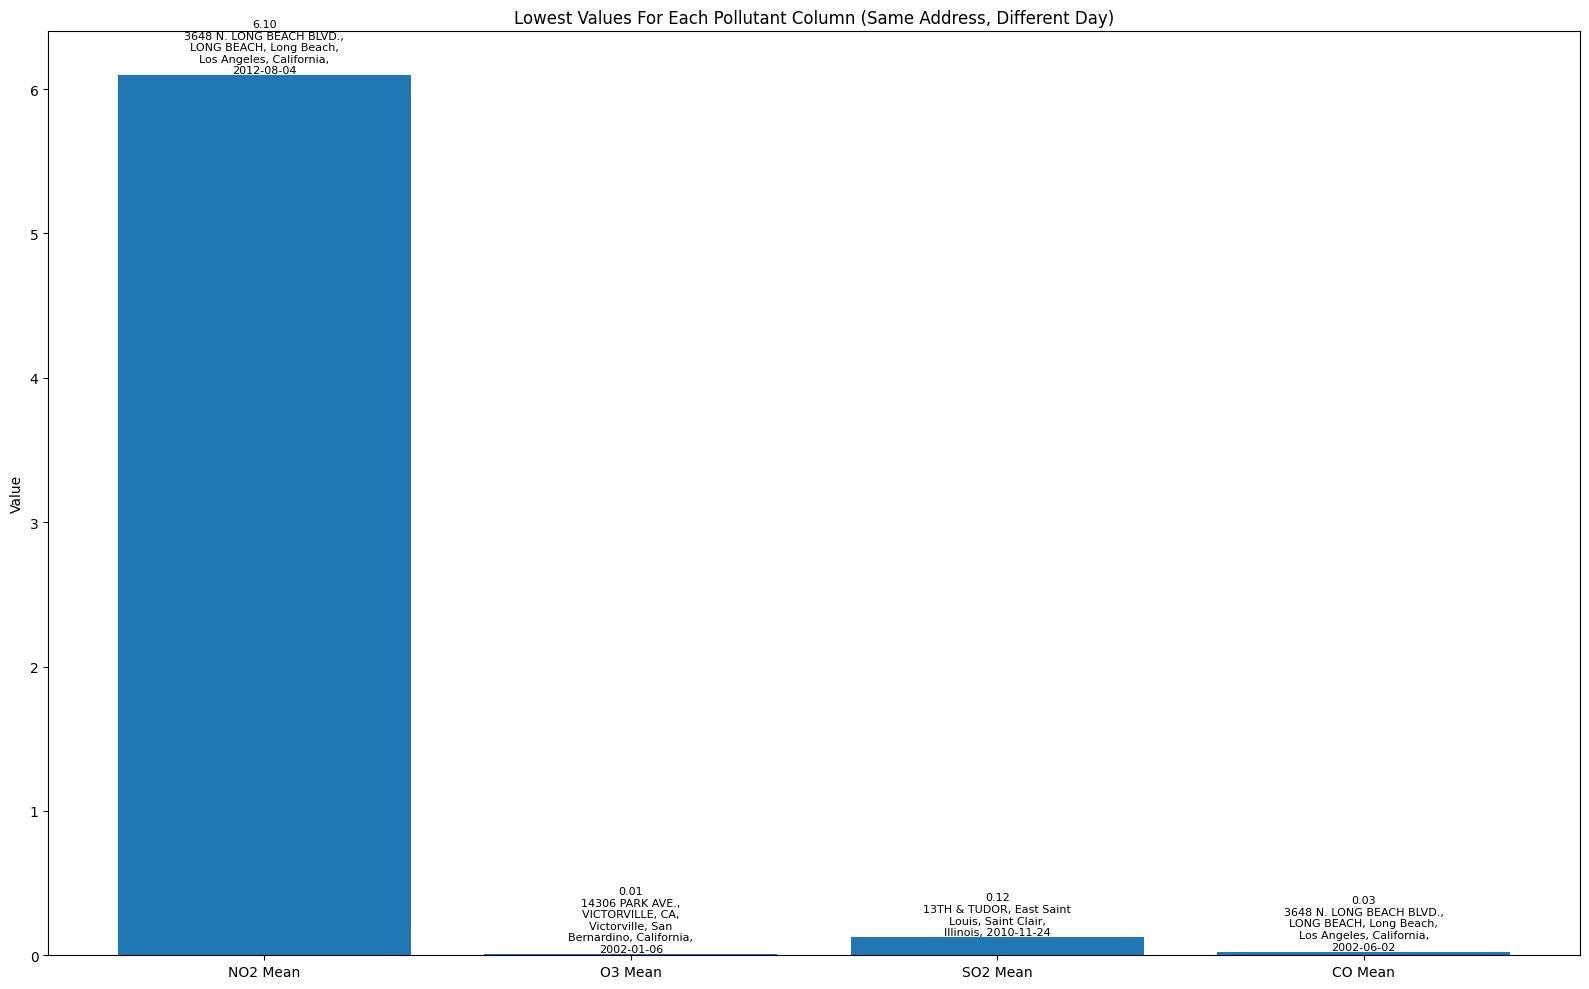

In [6]:
# Find highest and lowest value for each mean pollutant column and plot as two graphs with address, city, county, state, and date on bars
import textwrap
mean_cols = ["NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean"]  # Removed AQI columns
import matplotlib.pyplot as plt

# Highest values and addresses
high_vals = []
high_labels = []
high_bar_labels = []
high_indices = []
for col in mean_cols:
    high_idx = df[col].idxmax()
    high_indices.append(high_idx)
    high_vals.append(df.loc[high_idx, col])
    high_labels.append(col)
    addr = df.loc[high_idx, "Address"]
    city = df.loc[high_idx, "City"]
    county = df.loc[high_idx, "County"]
    state = df.loc[high_idx, "State"]
    date = df.loc[high_idx, "Date"]
    label = f"{addr}, {city}, {county}, {state}, {date}"
    wrapped_label = '\n'.join(textwrap.wrap(label, 25))
    high_bar_labels.append(wrapped_label)

plt.figure(figsize=(16,10))
bars = plt.bar(high_labels, high_vals)
plt.title("Highest Values For Each Pollutant Column")
plt.ylabel("Value")
plt.xticks(rotation=0)
for bar, value, label in zip(bars, high_vals, high_bar_labels):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:.2f}\n{label}', ha='center', va='bottom', fontsize=8, wrap=True)
plt.tight_layout()
plt.show()

# Lowest values for the same address but on a different day than the highest value for each pollutant
low_vals = []
low_labels = []
low_bar_labels = []
for col, high_idx in zip(mean_cols, high_indices):
    addr = df.loc[high_idx, "Address"]
    high_date = df.loc[high_idx, "Date"]
    # Filter for same address but different date
    mask = (df["Address"] == addr) & (df["Date"] != high_date)
    # Find the lowest value for this pollutant at that address on a different day
    if df.loc[mask, col].empty:
        low_val = float('nan')
        low_date = 'N/A'
        city = df.loc[high_idx, "City"]
        county = df.loc[high_idx, "County"]
        state = df.loc[high_idx, "State"]
    else:
        low_idx = df.loc[mask, col].idxmin()
        low_val = df.loc[low_idx, col]
        low_date = df.loc[low_idx, "Date"]
        city = df.loc[low_idx, "City"]
        county = df.loc[low_idx, "County"]
        state = df.loc[low_idx, "State"]
    low_vals.append(low_val)
    low_labels.append(col)
    label = f"{addr}, {city}, {county}, {state}, {low_date}"
    wrapped_label = '\n'.join(textwrap.wrap(label, 25))
    low_bar_labels.append(wrapped_label)

plt.figure(figsize=(16,10))
bars = plt.bar(low_labels, low_vals)
plt.title("Lowest Values For Each Pollutant Column (Same Address, Different Day)")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.ylim(bottom=0)  # Set y-axis to start at 0
for bar, value, label in zip(bars, low_vals, low_bar_labels):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:.2f}\n{label}', ha='center', va='bottom', fontsize=8, wrap=True)
plt.tight_layout()
plt.show()

With the two bar graphs depicted using Matplotlib, we had looked to compare the highest mean rates of pollution of 4 different pollutants. These rates found themselves stretching across different dates and different addreses. We gauge the highest level of pollution of a particular pollutant and in which area that value was reflected. We then went to deduce the lowest levels of that particular pollutant in that area, ona different date. We can use these graphs to help us determine pollution shift over time within a particular location/at a particular site.

---

## Section 2

Seaborn visualisations.

C:\Users\F_bee\AppData\Local\Temp\ipykernel_21988\4201450970.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pollutant", y="AQI", data=aqi_data, palette="Set2")


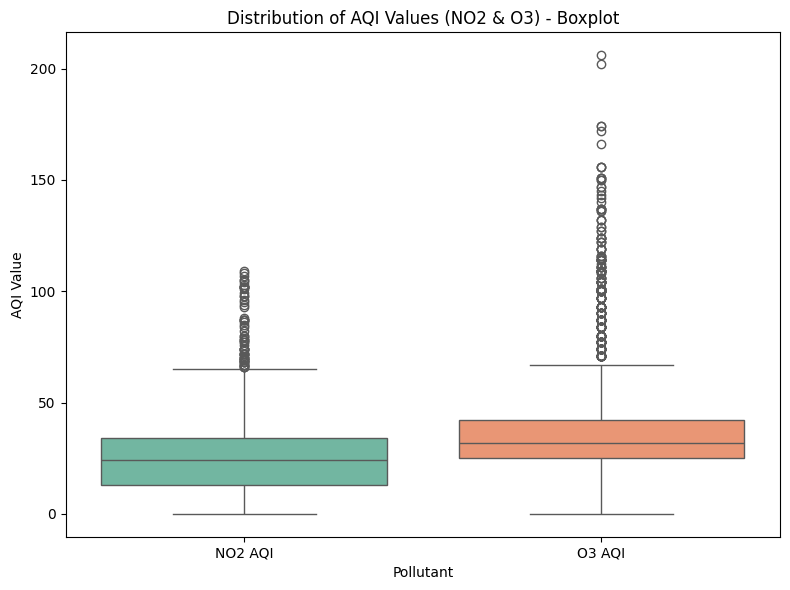

C:\Users\F_bee\AppData\Local\Temp\ipykernel_21988\4201450970.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Pollutant", y="AQI", data=aqi_data, palette="Set3")


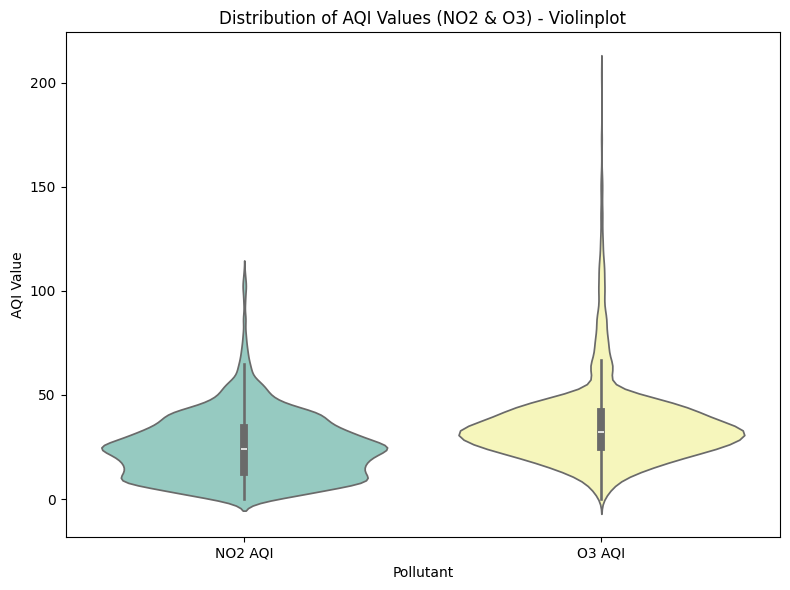

In [7]:
# Seaborn boxplot and violinplot for AQI values (NO2 AQI and O3 AQI)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

aqi_cols = ["NO2 AQI", "O3 AQI"]

# Prepare data for plotting
aqi_data = df.melt(value_vars=aqi_cols, var_name="Pollutant", value_name="AQI")

# Boxplot for AQI values
plt.figure(figsize=(8,6))
sns.boxplot(x="Pollutant", y="AQI", data=aqi_data, palette="Set2")
plt.title("Distribution of AQI Values (NO2 & O3) - Boxplot")
plt.ylabel("AQI Value")
plt.xlabel("Pollutant")
plt.tight_layout()
plt.show()

# Violinplot for AQI values
plt.figure(figsize=(8,6))
sns.violinplot(x="Pollutant", y="AQI", data=aqi_data, palette="Set3")
plt.title("Distribution of AQI Values (NO2 & O3) - Violinplot")
plt.ylabel("AQI Value")
plt.xlabel("Pollutant")
plt.tight_layout()
plt.show()

The Seaborn boxplot and violinplot visualize the distribution of AQI values for NO2 and O3. The boxplot shows the median, quartiles, and outliers for each pollutant, making it easy to compare their central tendency and spread. The violinplot adds a view of the data’s density, highlighting where AQI values are most concentrated. Together, these plots help you quickly assess differences in air quality between NO2 and O3, spot outliers, and understand the overall distribution of AQI values for each pollutant.

---

## Section 3

Plotly visualisations.

In [ ]:
# Interactive 3D scatter plot for California: All AQI
import plotly.express as px
df_ca = df[df['State'] == 'California']
fig_ca = px.scatter_3d(
    df_ca,
    x="NO2 AQI",
    y="O3 AQI",
    z="SO2 AQI",
    color="CO AQI",
    size="CO AQI",
    hover_data=["Address", "City", "County", "Date"],
    title="California: 3D Scatter Plot of All AQI"
 )
fig_ca.update_layout(
    margin=dict(l=0, r=0, b=0, t=40),
    scene_dragmode='orbit',
    scene={
        'xaxis': {'title': 'NO2 AQI', 'range': [df_ca['NO2 AQI'].min(), df_ca['NO2 AQI'].max()]},
        'yaxis': {'title': 'O3 AQI', 'range': [df_ca['O3 AQI'].min(), df_ca['O3 AQI'].max()]},
        'zaxis': {'title': 'SO2 AQI', 'range': [df_ca['SO2 AQI'].min(), df_ca['SO2 AQI'].max()]},
        'camera': {'eye': {'x': 1.5, 'y': 1.5, 'z': 1.5}}
    }
 )
fig_ca.show()

# Interactive 3D scatter plot for Florida: All AQI
df_fl = df[df['State'] == 'Florida']
fig_fl = px.scatter_3d(
    df_fl,
    x="NO2 AQI",
    y="O3 AQI",
    z="SO2 AQI",
    color="CO AQI",
    size="CO AQI",
    hover_data=["Address", "City", "County", "Date"],
    title="Florida: 3D Scatter Plot of All AQI"
 )
fig_fl.update_layout(margin=dict(l=0, r=0, b=0, t=40), scene_dragmode='orbit')
fig_fl.show()

The Plotly scatter plots about allow us to gauge air quality indidecs of different locations (sites) across different dates. We look to observe AQI pollutants for California and Florida, using NO2 AQI, O3 AQI, SO2 AQI as axes, CO AQI as color, and CO AQI as size.

With these graphs, we can better determine on which sepcifc dates was a particular index value served at a location, which may give us further insights into the pollution levels at there particular area and their main pollutants. 

---
---

## Insights

Here are a few insights from the notebook:

* The air pollution visualisations allow us to determine which area faced highest levels of pollution from a particular pollutant.
* 6 graphs were generated, each for each package/library.
* Ranges were very varied, with some lying at 0 and others far beyond this.

**NOTE**

* The dataset allowed for a view of pollution across different dates and different locations, but was only applicable to the US.
* Further there were skewered values that drew questions of whether or not the data was accurate due to potential entry error or sensor error, for instance.

---

## Conclusion

In conclusion, the dataset affords the opportunity to better deduce pollution levels across dfferent regions within a country to draw insights from these that may be applied in different settings, such as for research or medical purposes.